*** By: Lena Alnosh || 0197185 /  Abeer Abu Khalaf || 0191481***



# **Data Description**

The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.5 seconds. The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds. We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. So now we have 23 x 500 = 11500 pieces of information (row), each information contains 178 data points for 1 second (column), the last column represents the label y {1, 2, 3, 4, and 5}. All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizures. Only subjects in class 1 have epileptic seizures. Our motivation for creating this version of the data was to simplify access to the data via the creation of a .csv version of it. Although there are 5 classes most authors have done binary classification, namely class 1 (Epileptic seizure) against the rest.

The label from the data expresses 5 classes, each
class expresses its status:


---



---


*   Class 1 - Recording of seizure activity.
*   Class 2 - They recorder the EEG from the area where
     the tumor was located.

*   Class 3 - recording the EEG
     activity from the healthy brain area.
*   Class 4 - Eyes closed, means when they were
     recording the EEG signal the patient had their eyes
     closed.

*   Class 5 - Eyes open, means when they were
     recording the EEG signal of the brain the patient had
     their eyes open.

Table 1: Statistical work on the data

---



---


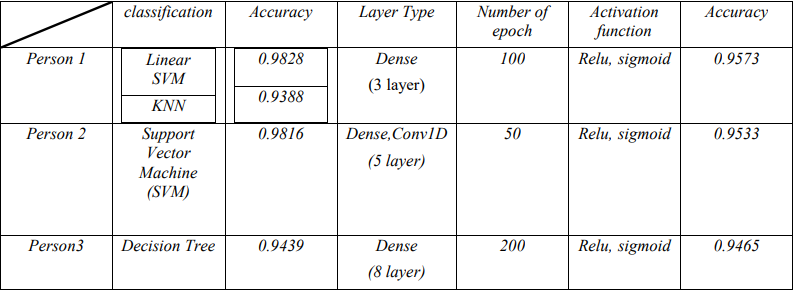

# **1- Importing the required libraries**

In [1]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn as sns 
import missingno as msno

# **2- Read csv file**

In [2]:
from google.colab import files
upload=files.upload()
Full_Data=pd.read_csv('Epileptic Seizure Recognition.csv')
Data=Full_Data

Saving Epileptic Seizure Recognition.csv to Epileptic Seizure Recognition.csv


In [3]:
Full_Data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


# **3- Discover and visualize the data**

  ## **A) Data Discovery**

let's know the features of data : 

In [4]:
Data.columns

Index(['Unnamed', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=180)

Let's take a look at the top five rows using the head() method :

In [5]:
print(Data.head())

      Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]


This graphic shows if there are missing values, because the number of feature is large this is good method, this data does not have any missing values it's **perfect** 

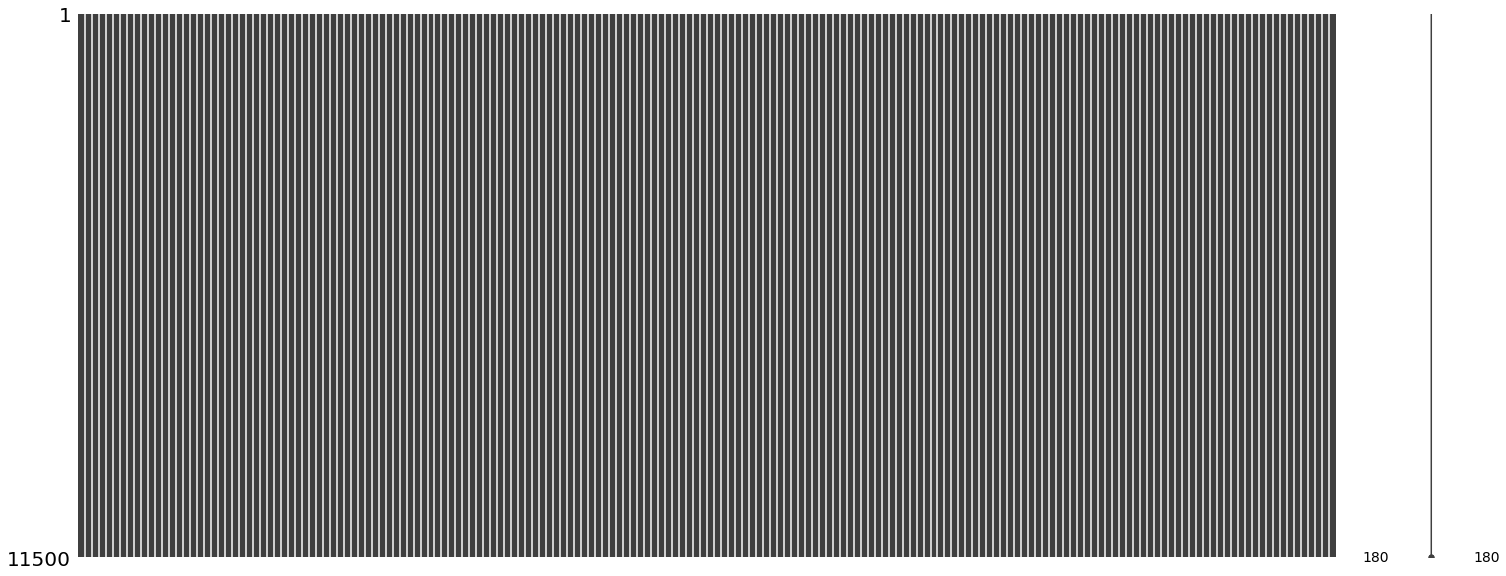

In [6]:
msno.matrix(Data,sort='ascending')

 Let's look at the summary of numerical attributes using the describe() method :

In [7]:
Data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


let's look the pairwise correlation of all columns in dataset by this graph :

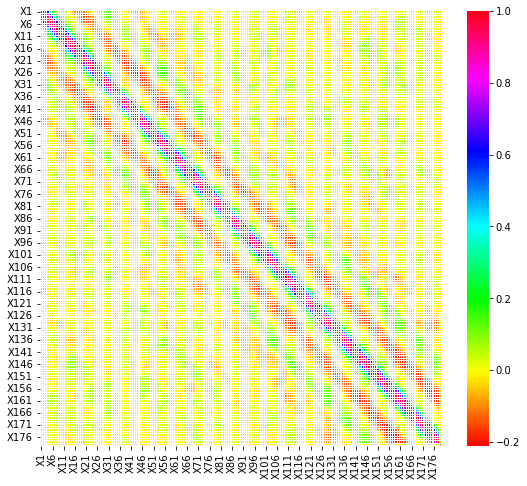

In [8]:
Corr_data=Data.corr()
f ,ax =plt.subplots(figsize=(9,8))
sns.heatmap(Corr_data,ax=ax ,cmap='hsv',linewidths=.1)

We want to show some EEG signals to people with epilepsy and some to normal people




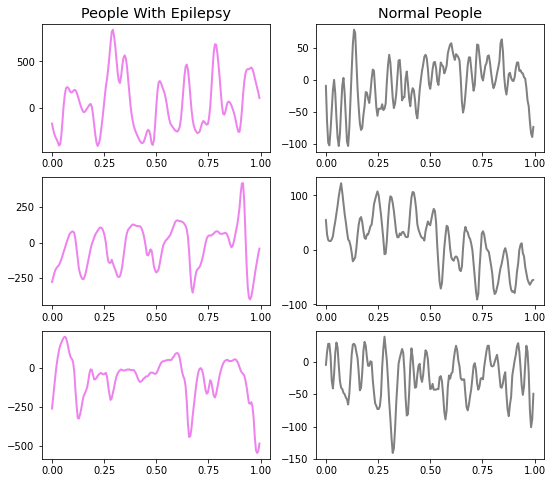

<Figure size 432x288 with 0 Axes>

In [9]:
fig, axs=plt.subplots(3,2,figsize=(9,8))
sns.set(font_scale=1.2)
Ts=1/178
'''These sample were taken and classified based on the label of data, so that
 if the value of label=1 then this is an infcted person, but this value is a normal person''' 
 # Sampling Rate
fs=1/Ts
x1=np.arange(0,1,Ts)
y1=Data.iloc[11,1:179]
axs[0,0].plot(x1,y1,color='violet',alpha=1,lw=2)
x2=np.arange(0,1,Ts)
y2=Data.iloc[8,1:179]
axs[1,0].plot(x2,y2,color='violet',alpha=1,lw=2)
x3=np.arange(0,1,Ts)
y3=Data.iloc[22,1:179]
axs[2,0].plot(x3,y3,color='violet',alpha=1,lw=2)
axs[0,0].set_title('People With Epilepsy')
x4=np.arange(0,1,Ts)
y4=Data.iloc[4,1:179]
axs[0,1].plot(x4,y4,color='grey',alpha=1,lw=2)
x5=np.arange(0,1,Ts)
y5=Data.iloc[5,1:179]
axs[1,1].plot(x5,y5,color='grey',alpha=1,lw=2)
x6=np.arange(0,1,Ts)
y6=Data.iloc[10,1:179]
axs[2,1].plot(x6,y6,color='grey',alpha=1,lw=2)
axs[0,1].set_title('Normal People')
plt.show()
sns.despine()

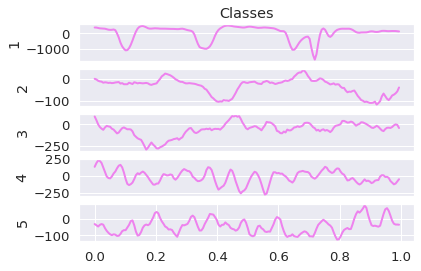

In [10]:
fig, axs=plt.subplots(5,figsize=(6,4))
Ts=1/178
'''These sample were taken and classified based on the label of data, so that
 if the value of label=1 then this is an infcted person, but this value is a normal person''' 
 # Sampling Rate
fs=1/Ts
x=np.arange(0,1,Ts)
y1=Data.iloc[1,1:179]
axs[0].plot(x,y1,color='violet',alpha=1,lw=2)
axs[0].set_title('Classes')
axs[0].get_xaxis().set_visible(False)
axs[0].set_ylabel('1')
y2=Data.iloc[7,1:179]
axs[1].plot(x,y2,color='violet',alpha=1,lw=2)
axs[1].get_xaxis().set_visible(False)
axs[1].set_ylabel('2')
y3=Data.iloc[12,1:179]
axs[2].plot(x,y3,color='violet',alpha=1,lw=2)
axs[2].get_xaxis().set_visible(False)
axs[2].set_ylabel('3')
y4=Data.iloc[0,1:179]
axs[3].plot(x,y4,color='violet',alpha=1,lw=2)
axs[3].get_xaxis().set_visible(False)
axs[3].set_ylabel('4')
y5=Data.iloc[2,1:179]
axs[4].plot(x5,y5,color='violet',alpha=1,lw=2)
axs[4].set_ylabel('5')
plt.show()

In [11]:
Data.head(15)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,...,49,31,11,-5,-17,-19,-15,-15,-11,4


  ## **B) Data Cleaning**

 We are removing Unnamed because it doesn't affect the target 

In [12]:
Data.drop('Unnamed',axis=1,inplace=True)
label=Data.y
Data.drop('y',axis=1,inplace=True)


To find out the percentage of each class in data :

In [13]:
label.value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

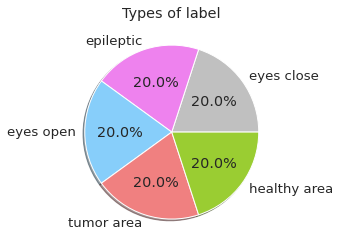

In [14]:
y =label.value_counts()
mycolors = ["silver",'violet','lightskyblue','lightcoral','yellowgreen']
label_name=['eyes close','epileptic','eyes open','tumor area','healthy area',]

plt.pie(y,labels=label_name, shadow = True,colors=mycolors,autopct='%1.1f%%')
plt.title('Types of label')
plt.show() 

In this dataset a rather large number of feature, we need to do dimensionality reduction by principle component analysis(PCA)

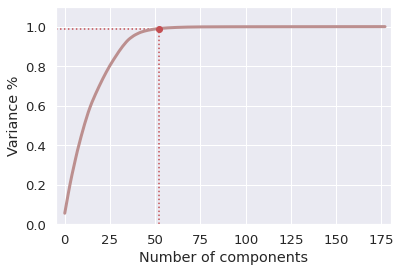

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(Data)
# This image shows the relationship between varience and number of component
x=np.argmax(np.cumsum(pca.explained_variance_ratio_)>=.99)
plt.axis([-5,180, 0, 1.1])  
plt.plot([-5,x],[.99,.99],"r:")
plt.plot([x,x],[0,.99],"r:")
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='rosybrown',lw=3)
plt.xlabel('Number of components')
plt.ylabel('Variance %')
plt.plot(x,.99,"ro")
plt.show()

We want to keep 99% of the variance  in data a note that the number of components is decreses a good percentage :

In [16]:
# To Save 99% of variance in data
pca = PCA(.99)
C=pca.fit_transform(Data)
# number of components most variance in them ,the number of feature has decreased from (178 - 53) it's perfect
C.shape

(11500, 53)

In [17]:
new_data=pd.concat([pd.DataFrame(C,columns=Data.columns[0:53]),label],axis=1)

Let's separate the data into two parts : Train Data and Test Data by 

StratifiedShuffleSplit to ensure that the data is separated equally depending on label

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
for train_index, test_index in split.split(new_data,new_data[['y']]):
    train_set = new_data.iloc[train_index]
    test_set = new_data.iloc[test_index]

We note that the data is distributed symmetrically between the train data,test data and val data, so that the ratio of true and false is almost the same in both 

In [19]:
print(test_set['y'].value_counts() / len(test_set))

print(train_set['y'].value_counts() / len(train_set))

2    0.2
4    0.2
5    0.2
3    0.2
1    0.2
Name: y, dtype: float64
2    0.2
1    0.2
5    0.2
3    0.2
4    0.2
Name: y, dtype: float64


In [20]:
train_lable=train_set.y.copy()
test_lable=test_set.y.copy()
train_set.drop('y',inplace=True,axis=1)
test_set.drop('y',inplace=True,axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


To get to an optimal solution quickly,we make a Standard Scale

In [21]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_set=ss.fit_transform(train_set)
test_set=ss.fit_transform(test_set)

# **4- Select and Train a  classical Model**

## **Decision Tree model**

In [22]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(train_set, train_lable)
from sklearn.model_selection import GridSearchCV
pram={'max_depth':[50,100,200],'min_samples_split':[200,300,100],'max_leaf_nodes':[100,60,200]}
grid_search=GridSearchCV(dtc,pram,cv=8)
grid_search.fit(train_set,train_lable)
dtc_final=grid_search.best_estimator_

from sklearn.model_selection import cross_val_score
cross_val_score(dtc_final,train_set,train_lable,cv=3,scoring='accuracy')

array([0.537985  , 0.53896316, 0.53424658])

 Plot a decision tree , please ZOOM in to read it

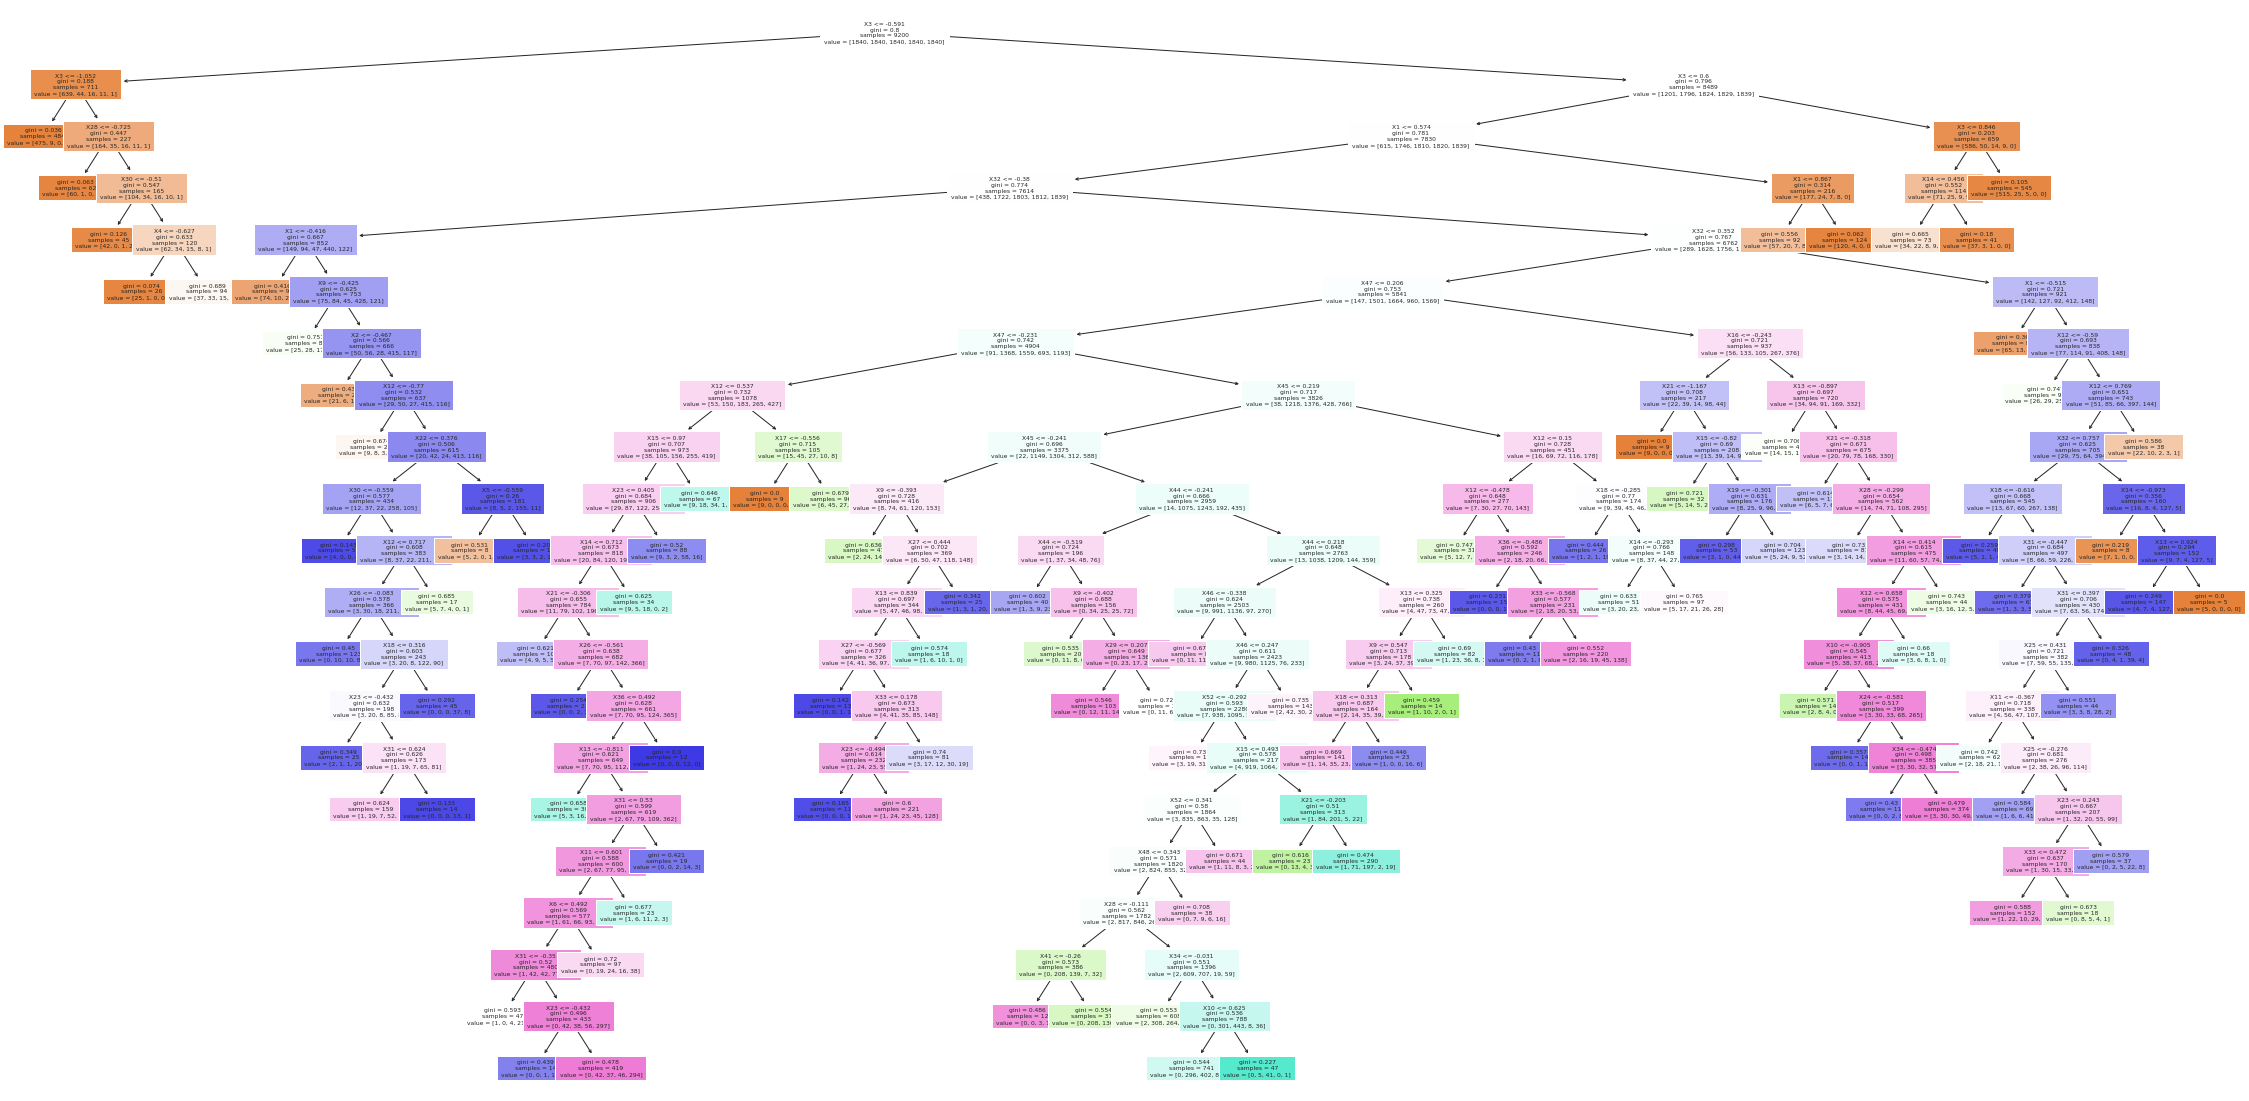

In [23]:
from sklearn import tree 
plt.figure(figsize=(40,20))
tree.plot_tree(dtc_final,feature_names=new_data.columns,filled=True,fontsize=6)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
dtc_pre = dtc_final.predict(train_set)
print('Accuracy of train set ',accuracy_score(train_lable,dtc_pre))
dtc_pre_ = dtc_final.predict(test_set)
print('Accuracy of test set  ',accuracy_score(test_lable,dtc_pre_))

Accuracy of train set  0.6332608695652174
Accuracy of test set   0.5669565217391305


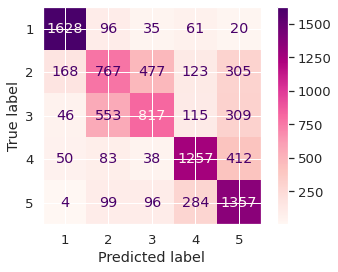

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(train_lable,dtc_pre,cmap='RdPu')

## **Random Forest Classifier**

In [26]:
from sklearn import ensemble
rf_clf = ensemble. RandomForestClassifier(n_estimators=50,random_state=42)

rf_clf.fit(train_set, train_lable) 
cross_val_score(rf_clf,train_set,train_lable,cv=3,scoring='accuracy')

array([0.69546788, 0.68894685, 0.69667319])

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
rf_pre = rf_clf.predict(train_set)
print('Accuracy of train set:',accuracy_score(train_lable,rf_pre))
rf_pre_ = rf_clf.predict(test_set)
print('Accuracy of test set :',accuracy_score(test_lable,rf_pre_))

Accuracy of train set: 1.0
Accuracy of test set : 0.7282608695652174


From the results above, it is clear that overfitting has occurred

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_lable,rf_pre_)

array([[447,   1,   1,  11,   0],
       [ 24, 228, 154,  17,  37],
       [  7,  92, 292,  28,  41],
       [  3,   3,   9, 359,  86],
       [  0,   9,  23,  79, 349]])

## **SGDClassifier**

In [29]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42,alpha=.01,max_iter=2000)
sgd.fit(train_set, train_lable)
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,train_set,train_lable,cv=4,scoring='accuracy')

array([0.24391304, 0.23652174, 0.25086957, 0.21913043])

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
sgd_pre = sgd.predict(test_set)
print('Accuracy ',accuracy_score(test_lable,sgd_pre))

Accuracy  0.24304347826086956


In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_lable,sgd_pre)

array([[215,  46,  70,  40,  89],
       [ 70,  28,  82,  72, 208],
       [ 76,  23,  93,  72, 196],
       [142,  31, 105,  55, 127],
       [ 95,  17, 105,  75, 168]])

It's very Bad

## **LogisticRegression**

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
from sklearn.model_selection import GridSearchCV
pram={'tol':[.00001,.001,.000001],'max_iter':[900,1000,800,2000]}
grid_search=GridSearchCV(sgd,pram,cv=8)
grid_search.fit(train_set,train_lable)
log_model=grid_search.best_estimator_

cross_val_score(log_model,train_set,train_lable,cv=4,scoring='accuracy')

array([0.25695652, 0.2273913 , 0.26608696, 0.21434783])

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
log_pre = log_model.predict(test_set)
print('Accuracy ',accuracy_score(test_lable,log_pre))

Accuracy  0.25130434782608696


In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_lable,log_pre)

array([[239,  39,  69,  56,  57],
       [118,  60,  79,  95, 108],
       [109,  61,  70, 103, 117],
       [182,  44,  69,  89,  76],
       [122,  58,  69,  91, 120]])

it's very Bad

## **Voting classifier**

We want to use more than one model at the same tim ein order to get a very high accuracy

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
svm_clf = SVC(gamma='scale', probability=True, random_state=42)
voting_clf = VotingClassifier(estimators=[ ('rf', rf_clf), ('dtc',dtc_final),('svm',svm_clf)], voting='hard')

voting_clf.fit(train_set,train_lable)
cross_val_score(voting_clf,train_set,train_lable,cv=4,scoring='accuracy')

array([0.65608696, 0.65608696, 0.66608696, 0.6626087 ])

In [36]:
from sklearn.metrics import accuracy_score

for clf in (rf_clf, dtc_final, svm_clf, voting_clf):
    clf.fit(train_set, train_lable)
    y_pred = clf.predict(test_set)
    print(clf.__class__.__name__, accuracy_score(test_lable, y_pred))

RandomForestClassifier 0.7282608695652174
DecisionTreeClassifier 0.5669565217391305
SVC 0.5639130434782609
VotingClassifier 0.6904347826086956


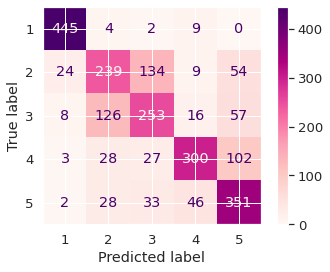

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_lable,y_pred,cmap='RdPu')

## **K-means**

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42,max_iter=100,n_init=70)
y_pred = kmeans.fit_predict(train_set)
# inertia_ lower is better so value in this very large
kmeans.inertia_

469918.07154258306

In [39]:
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(train_set) for k in range(1, 10)]
silhouette_scores = [silhouette_score(train_set, model.labels_)
                     for model in kmeans_per_k[1:]]

The best value of K = 2 or 3, because it achieves the highest score from this graph

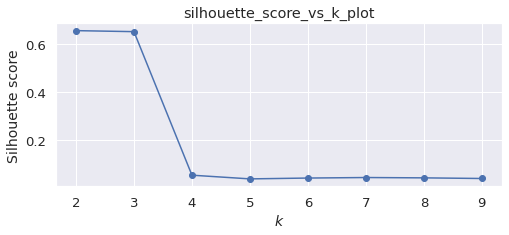

In [40]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title('silhouette_score_vs_k_plot')
plt.show()

from this graph we notice that the inertia values are very high even when k=9 it is not a good choice

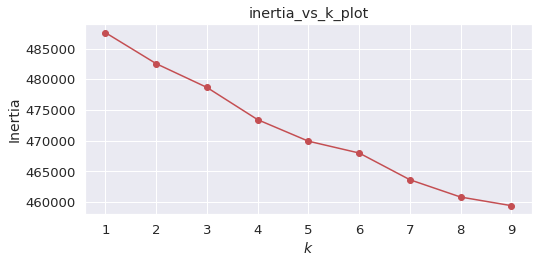

In [41]:
inertias = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-",color='r')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title("inertia_vs_k_plot")
plt.show()

## **Binary Classifer**

In [42]:
train_label_binary=(train_lable==1).astype(np.float64)
test_label_binary=(test_lable==1).astype(np.float64)

If we assume that prediction is always true, then the accuracy value is 80%

In [43]:
Predict=np.zeros(train_label_binary.shape)
from sklearn.metrics import accuracy_score
accuracy_score(train_label_binary,Predict)

0.8

### **Random Forest Classifier**

In [44]:
from sklearn import ensemble
rf_clf = ensemble. RandomForestClassifier(n_estimators=100)

rf_clf.fit(train_set, train_label_binary) 
cross_val_score(rf_clf,train_set,train_label_binary,cv=3,scoring='accuracy')

array([0.97065536, 0.97358983, 0.97488584])

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
rf_pre = rf_clf.predict(test_set)
print('Accuracy ',accuracy_score(test_label_binary,rf_pre))
print('precision',precision_score(test_label_binary,rf_pre))
print('recall   ',recall_score(test_label_binary,rf_pre))

Accuracy  0.9765217391304348
precision 0.9491150442477876
recall    0.9326086956521739


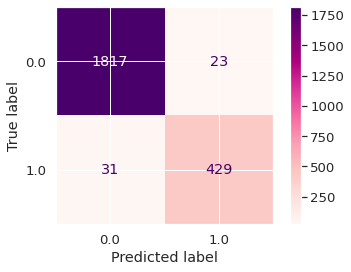

In [46]:
ConfusionMatrixDisplay.from_predictions(test_label_binary,rf_pre,cmap='RdPu')

### **SGDClassifier**

In [47]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42,alpha=.0001,max_iter=2000)
sgd.fit(train_set, train_label_binary)
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,train_set,train_label_binary,cv=4,scoring='accuracy')

array([0.83782609, 0.84913043, 0.84130435, 0.83869565])

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
sgd_pre = sgd.predict(train_set)
print('Accuracy ',accuracy_score(train_label_binary,sgd_pre))
print('precision',precision_score(train_label_binary,sgd_pre))
print('recall   ',recall_score(train_label_binary,sgd_pre))

Accuracy  0.8495652173913043
precision 0.9384615384615385
recall    0.26521739130434785


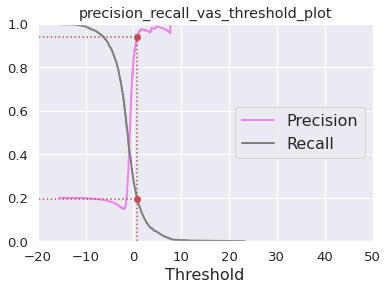

In [49]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

scores=cross_val_predict(sgd,train_set,train_label_binary,method='decision_function')
precisions, recalls, thresholds = precision_recall_curve( train_label_binary ,scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], color='violet', label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], color='grey', label="Recall", linewidth=2)
    threshold_precision = thresholds[np.argmax(precisions >= 0.9384615384615385)]
    plt.plot([-50000, threshold_precision], [0.9384615384615385, 0.9384615384615385], "r:") 
    recall_precision = recalls[np.argmax(precisions >= 0.9384615384615385)] 
    plt.plot([-50000, threshold_precision], [recall_precision, recall_precision], "r:")  
    plt.plot([threshold_precision, threshold_precision], [0., 0.9384615384615385], "r:") 
    plt.plot([threshold_precision], [0.9384615384615385], "ro")                                             # Not shown
    plt.plot([threshold_precision], [recall_precision], "ro")    
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-20,50, 0, 1])             # Not shown
    plt.title('precision_recall_vas_threshold_plot')
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)